In [1]:
import multiCNN as mt
from multiCNN.cv_trainer import CVTrainer
from jalert.alert import se
import time

task_names=["diagnosis","充実部単純CT濃度","充実部のwash_out","早期相不均一さ","嚢胞変性"]

# task_names=["diagnosis"]
# task_names=["充実部単純CT濃度"]
grouping="diagnosis"
ch_list=[[0,1,2],[1,2,3]]
new_diagnosis_cor=[0,1,2]
sampling_feature="diagnosis"
inception_use_aux_logits=True
crop_by_mask_stat=0.1
crop_by_mask_exec=0.1
epoch_size=300
shift_loader=False
shift_stop=False
use_mid_x=False
use_radio_pred_for_diag=True
initialize_zero=False
lambda_dict={"充実部単純CT濃度":0.1,"充実部のwash_out":0.3,"早期相不均一さ":0.3}
# lambda_dict={"充実部単純CT濃度":0.1}
# lambda_dict={}
use_aux_task_names=["diagnosis","充実部単純CT濃度","充実部のwash_out","早期相不均一さ"]
# use_aux_task_names=["diagnosis"]
mid_x_task_names=["充実部単純CT濃度"]
# mid_x_task_names=[]
mask_normalize=True
use_normalize=True
use_bce=False
bce_noise_std=0.05
coral=False
imbalance_measure="sampler"
full_fineturning_epoch=100
attn_use=False
attn_heads=1
pretrained_imagenet=True
# pretrained_path="/data1/RCC/SimCLR_logs2/2022_07_27__06_42_59/checkpoint_0200.pth.tar"
# pretrained_path="/data1/RCC/SimCLR_logs2/2022_07_27__08_38_07/checkpoint_0600.pth.tar"
pretrained_path= '/data1/RCC/SimCLR_logs2/2022_07_27__16_18_04/checkpoint_0400.pth.tar'
pretrained_path=None
input_infos=True
eval_use_infos=True

def lambda_func(epoch,lambda_ini):
    if epoch>110:
        factor=min(epoch-110,25)
        lambda_epoch=lambda_ini*0.85**factor
    else:
        lambda_epoch=lambda_ini
    return lambda_epoch
lambda_func_dict={}
# lambda_func_dict={"充実部単純CT濃度":lambda_func,"充実部のwash_out":lambda_func,"早期相不均一さ":lambda_func}

start=time.time()
print(start)
# trainer=CVTrainer(tag="check_multitask",device="cuda:1",coral=False)
trainer=CVTrainer(tag="check_multitask",device="cuda:0",coral=coral,
                  task_names=task_names,grouping=grouping,
                  sampling_feature=sampling_feature,ch_list=ch_list,
                  crop_by_mask_stat=crop_by_mask_stat,crop_by_mask_exec=crop_by_mask_exec,inception_use_aux_logits=inception_use_aux_logits,
                  epoch_size=epoch_size,shift_loader=shift_loader,use_mid_x=use_mid_x,
                  use_radio_pred_for_diag=use_radio_pred_for_diag,
                  initialize_zero=initialize_zero,
                  lambda_dict=lambda_dict,
                  use_aux_task_names=use_aux_task_names,
                  mid_x_task_names=mid_x_task_names,mask_normalize=mask_normalize,
                 use_bce=use_bce,bce_noise_std=bce_noise_std,
                 imbalance_measure=imbalance_measure,full_fineturning_epoch=full_fineturning_epoch,
                 lambda_func_dict=lambda_func_dict,attn_use=attn_use,attn_heads=attn_heads,
                  pretrained_path=pretrained_path,pretrained_imagenet=pretrained_imagenet,new_diagnosis_cor=new_diagnosis_cor,
                  use_normalize=use_normalize,input_infos=input_infos,eval_use_infos=eval_use_infos)
                  
# trainer.cross_varidation(seed=True)
# trainer.show_max_score(eval_by="mix",eval_by_feature="diagnosis_opt")
# end=time.time()
# elapsed_time=end-start
# print(f"time : {elapsed_time/60} min")
# se()


1661783309.7493806
test init start
ch_list -> ensemble mode
test init finish


In [2]:
# 存在するスコアファイルを獲得
import glob
import re
def fetch_num(string):
    result = re.sub(r"\D", "", string)
    return result
score_path_list=glob.glob("/data1/RCC/out_check_multitask/score_*.pkl")

strs=score_path_list[0]
date_tag_list=[]
for score_path in score_path_list:
    pattern=r"/data1/RCC/out_check_multitask/score_([0-9_]+).pkl"
    m=re.match(pattern, score_path)
    date_tag_list.append(m.group(1))
date_tag_list=sorted(date_tag_list,key=fetch_num)

date="2022_05_19"
date_tag_list=[date_tag for date_tag in date_tag_list if date in date_tag]
print(date_tag_list)

['2022_05_19__06_38_39', '2022_05_19__06_41_45', '2022_05_19__10_09_16']


In [30]:
# trainerにセット
from multiCNN.utils.general import PickleCPU
import pickle
# date_tagを指定（date_tagは"2022_03_14__00_01_9"のように定義）
date=date_tag_list[-2]
# date="2022_07_29__12_01_30"
# date="2022_07_30__23_50_33"
# date="2022_07_28__13_09_26"
# date="2022_07_31__15_51_59"
# date="2022_07_29__23_56_08"
date="2022_07_30__23_50_33"
# date="2022_07_31__15_51_59"
# date="2022_08_29__21_27_21"
# date="2022_07_30__23_50_33"


print(date)
with open(f"/data1/RCC/out_check_multitask/score_{date}.pkl", 'rb') as f:
    score=PickleCPU(f).load()
#     score = pickle.load(f)
with open(f"/data1/RCC/out_check_multitask/result_{date}.pkl", 'rb') as f:
    result = pickle.load(f)
trainer.score=score
trainer.result=result
trainer.not_show_cm=True
# pik=pickle.load("/data1/RCC/out_check_multitask/score_2022_03_15__09_24_06.pkl")

2022_07_30__23_50_33


In [24]:
trainer.show_max_score(eval_by="mix",eval_by_feature="diagnosis_opt")

None
29

 diagnosis_opt
acc_train 0.9146666666666668
acc_train  std  0.0011925695879998557
acc_test 0.8829302987197725
acc_test  std  0.003244366055547354
precision_0_train 0.9310257131227437
precision_0_train  std  0.00921181947821225
precision_0_test 0.9795238095238096
precision_0_test  std  0.003407341679999687
precision_1_train 0.8856006150728002
precision_1_train  std  0.0075464528718585215
precision_1_test 0.589047619047619
precision_1_test  std  0.01735614668249836
precision_2_train 0.9314770625231225
precision_2_train  std  0.004141854734127652
precision_2_test 0.7476190476190475
precision_2_test  std  0.03939738817499628
sensitivity_0_train 0.9010888608101151
sensitivity_0_train  std  0.0008168274424067579
sensitivity_0_test 0.8866666666666667
sensitivity_0_test  std  0.0029814239699997138
sensitivity_1_train 0.9349690098261527
sensitivity_1_train  std  0.0008511593601427787
sensitivity_1_test 0.8333333333333333
sensitivity_1_test  std  0.03726779962499648
sensitivity_2_train 

In [25]:
trainer.show_max_score(eval_by=["auroc_0_test","auroc_1_test","auroc_2_test"],eval_by_feature="diagnosis")

None
103

 diagnosis_opt
acc_train 0.9800000000000001
acc_train  std  0.0029814239699997385
acc_test 0.8620199146514935
acc_test  std  0.01622183027773672
precision_0_train 0.9842128603104212
precision_0_train  std  0.00866662267110782
precision_0_test 0.9866518353726363
precision_0_test  std  0.0029847403481643286
precision_1_train 0.970606091493201
precision_1_train  std  0.0009825078108117145
precision_1_test 0.539047619047619
precision_1_test  std  0.045999112679995666
precision_2_train 0.983894399284063
precision_2_train  std  0.000464256338978262
precision_2_test 0.7488888888888889
precision_2_test  std  0.05565324743999477
sensitivity_0_train 0.9735521128324727
sensitivity_0_train  std  0.0023678058932156856
sensitivity_0_test 0.9
sensitivity_0_test  std  0.014907119849998594
sensitivity_1_train 0.996078431372549
sensitivity_1_train  std  0.0008768894029410908
sensitivity_1_test 0.8833333333333332
sensitivity_1_test  std  0.026087459737497577
sensitivity_2_train 0.97458713582735

In [6]:
trainer.show_max_score(key=250)

None
250

 diagnosis_opt
acc_train 0.9960000000000001
acc_train  std  0.002086996778999822
acc_test 0.883641536273115
acc_test  std  0.02105657185070921
precision_0_train 0.9875056999544004
precision_0_train  std  0.005975083606086992
precision_0_test 0.9534770114942528
precision_0_test  std  0.005018301983986584
precision_1_train 1.0
precision_1_train  std  0.0
precision_1_test 0.6857142857142857
precision_1_test  std  0.09742867616249083
precision_2_train 1.0
precision_2_train  std  0.0
precision_2_test 0.8742857142857143
precision_2_test  std  0.028110568859997343
sensitivity_0_train 1.0
sensitivity_0_train  std  0.0
sensitivity_0_test 0.9400000000000001
sensitivity_0_test  std  0.008944271909999166
sensitivity_1_train 0.9923469387755102
sensitivity_1_train  std  0.002852127522321157
sensitivity_1_test 0.6833333333333333
sensitivity_1_test  std  0.003726779962499661
sensitivity_2_train 0.9961538461538462
sensitivity_2_train  std  0.0034401045807689198
sensitivity_2_test 0.65
sensiti

29
class:0 auc:0.8733333333333333


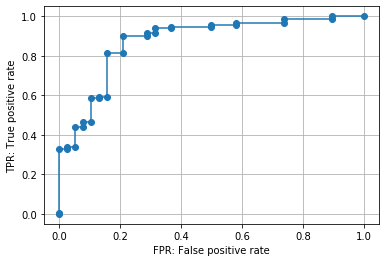

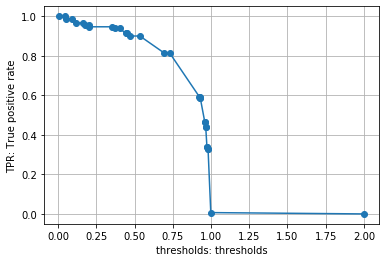

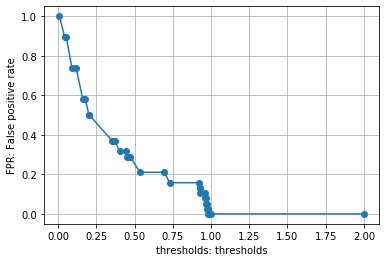

class:1 auc:0.7739825581395349


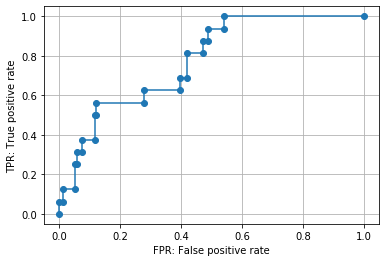

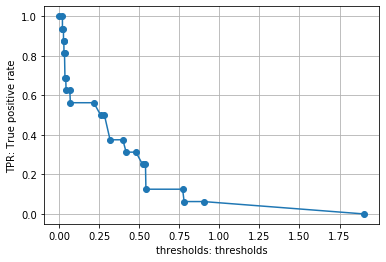

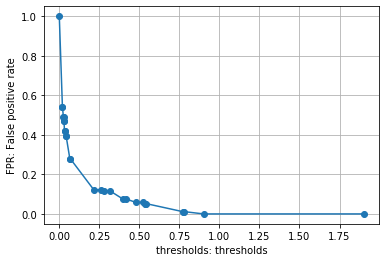

class:2 auc:0.9126506024096386


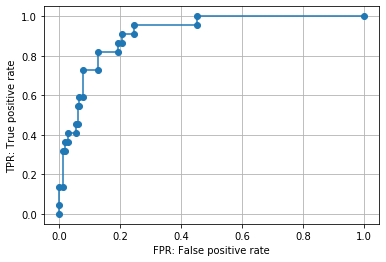

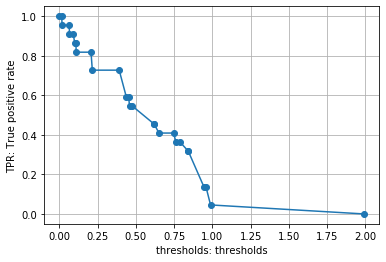

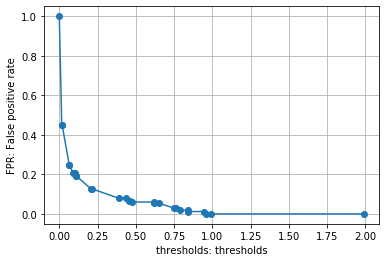

250
class:0 auc:0.8887719298245614


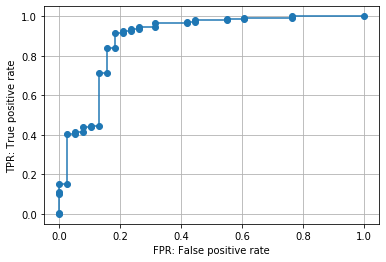

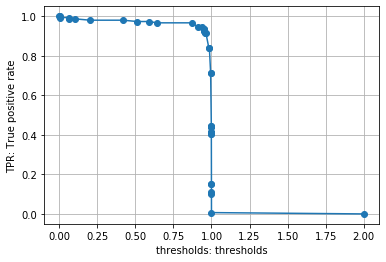

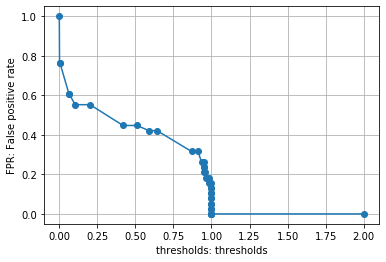

class:1 auc:0.7441860465116279


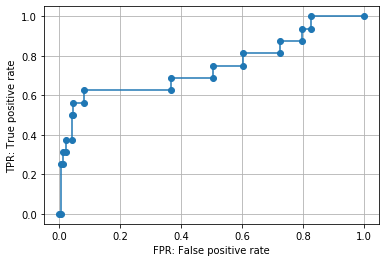

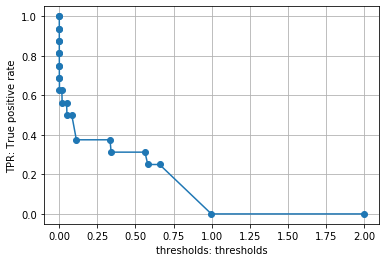

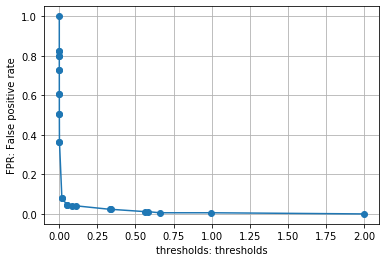

class:2 auc:0.9214129244249726


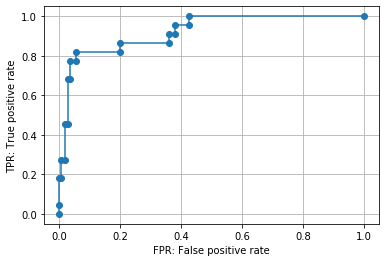

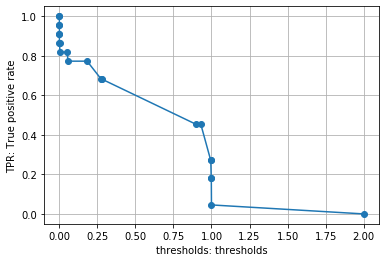

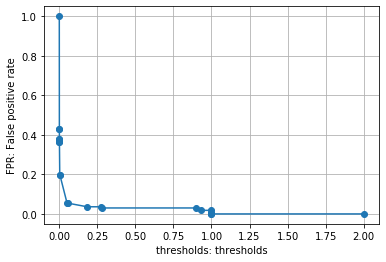

In [7]:
print(29)
trainer.plot_curves(29)
print(250)
trainer.plot_curves(250)

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
print(trainer.result[0]["diagnosis"].keys())
# print(trainer.result[0]["diagnosis"]["label_test"][115])
# print(trainer.result[0]["diagnosis"]["probability_test"][115])
def plot_curves(self,epoch):
#     epoch=115
    prob_epoch=[]
    label_epoch=[]
    for chunk in range(len(trainer.result)):
        prob_epoch+=trainer.result[chunk]["diagnosis"]["probability_test"][epoch]
        label_epoch+=trainer.result[chunk]["diagnosis"]["label_test"][epoch]
    label_list_classes=[]
    prob_list_classes=[]
    for i_class in range(len(prob_epoch[0])):
        prob_list_classes.append([elm[i_class] for elm in prob_epoch] )
        label_list_classes.append([1 if elm==i_class else 0 for elm in label_epoch])
    for i_class in range(len(prob_epoch[0])):
        fpr, tpr, thresholds = roc_curve(label_list_classes[i_class], prob_list_classes[i_class])
        plt.plot(fpr, tpr, marker='o')
        plt.xlabel('FPR: False positive rate')
        plt.ylabel('TPR: True positive rate')
        plt.grid()
        plt.show()
        plt.plot(thresholds, tpr, marker='o')
        plt.xlabel('thresholds: thresholds')
        plt.ylabel('TPR: True positive rate')
        plt.grid()
        plt.show()
# plt.savefig('data/dst/sklearn_roc_curve.png')


dict_keys(['accession_id_test', 'label_test', 'predicted_test', 'probability_test', 'predicted_opt_test'])


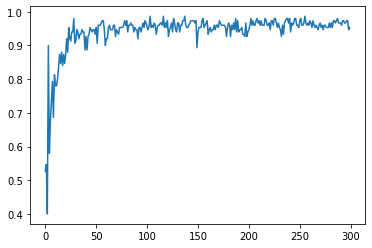

In [9]:

trainer.score[0]["diagnosis"].keys()
score_mean=[]
for i_elm in range(len(trainer.score[0]["diagnosis"]["sensitivity_1_test"])):
    score_elm=0
    for i_chunk in range(len(trainer.score)):
        score_elm+=trainer.score[i_chunk]["diagnosis"]["sensitivity_0_test"][i_elm]
    score_elm/=len(trainer.score)
    score_mean.append(score_elm)
# plt.plot(trainer.score[0]["diagnosis"]["sensitivity_2_test"])
plt.plot(score_mean)

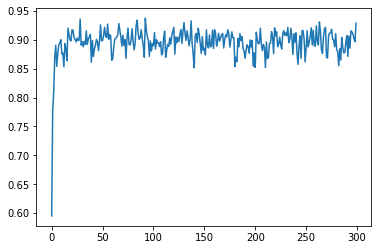

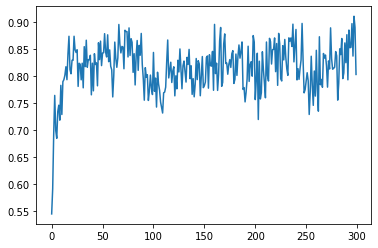

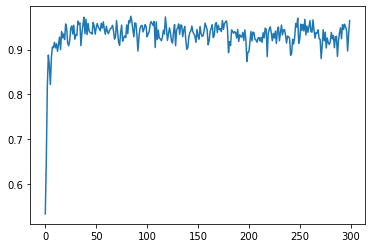

In [10]:
trainer.plot_score_mean("diagnosis","auroc_0_test")
plt.show()
trainer.plot_score_mean("diagnosis","auroc_1_test")
plt.show()
trainer.plot_score_mean("diagnosis","auroc_2_test")
plt.show()

max_id 29
subtype 0
ref_taskname 充実部のwash_out
cond func 0
accession: 1210141125505740
{'diagnosis': {'accession_id_test': '1210141125505740',
               'label_test': 1,
               'predicted_opt_test': 0,
               'predicted_test': 0,
               'probability_test': [0.9986961483955383,
                                    0.0008009048178792,
                                    0.0005030619213357568]},
 '充実部のwash_out': {'accession_id_test': '1210141125505740',
                  'label_test': 2,
                  'predicted_opt_test': 1,
                  'predicted_test': 2.0,
                  'probability_test': [0.8217123746871948, 0.6906276941299438]},
 '充実部単純CT濃度': {'accession_id_test': '1210141125505740',
               'label_test': 1,
               'predicted_opt_test': 1,
               'predicted_test': 1.0,
               'probability_test': [0.5417400002479553, 0.30400460958480835]},
 '早期相不均一さ': {'accession_id_test': '1210141125505740',
             'label

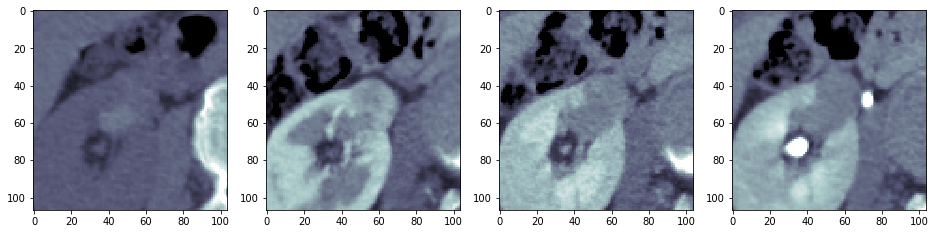

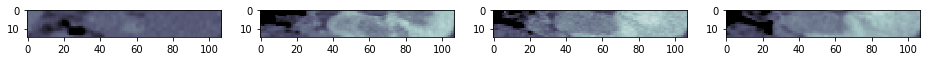

(0.14285714285714285, 1, 7)
cond func 1
accession: 1210141125505740
{'diagnosis': {'accession_id_test': '1210141125505740',
               'label_test': 1,
               'predicted_opt_test': 0,
               'predicted_test': 0,
               'probability_test': [0.9986961483955383,
                                    0.0008009048178792,
                                    0.0005030619213357568]},
 '充実部のwash_out': {'accession_id_test': '1210141125505740',
                  'label_test': 2,
                  'predicted_opt_test': 1,
                  'predicted_test': 2.0,
                  'probability_test': [0.8217123746871948, 0.6906276941299438]},
 '充実部単純CT濃度': {'accession_id_test': '1210141125505740',
               'label_test': 1,
               'predicted_opt_test': 1,
               'predicted_test': 1.0,
               'probability_test': [0.5417400002479553, 0.30400460958480835]},
 '早期相不均一さ': {'accession_id_test': '1210141125505740',
             'label_test': 2,
       

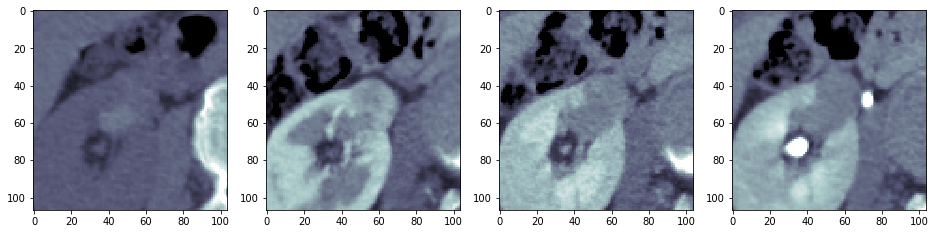

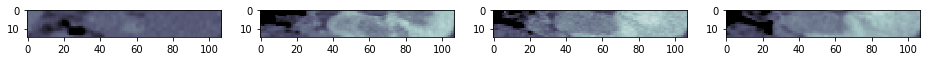

(0.3333333333333333, 1, 3)
cond func 2
accession: 1110000000662059
{'diagnosis': {'accession_id_test': '1110000000662059',
               'label_test': 1,
               'predicted_opt_test': 1,
               'predicted_test': 0,
               'probability_test': [0.8898482322692871,
                                    0.03320746496319771,
                                    0.07694438099861145]},
 '充実部のwash_out': {'accession_id_test': '1110000000662059',
                  'label_test': 0,
                  'predicted_opt_test': 1,
                  'predicted_test': 2.0,
                  'probability_test': [0.7480983734130859, 0.5858314633369446]},
 '充実部単純CT濃度': {'accession_id_test': '1110000000662059',
               'label_test': 2,
               'predicted_opt_test': 2,
               'predicted_test': 2.0,
               'probability_test': [0.7498030662536621, 0.5301670432090759]},
 '早期相不均一さ': {'accession_id_test': '1110000000662059',
             'label_test': 2,
          

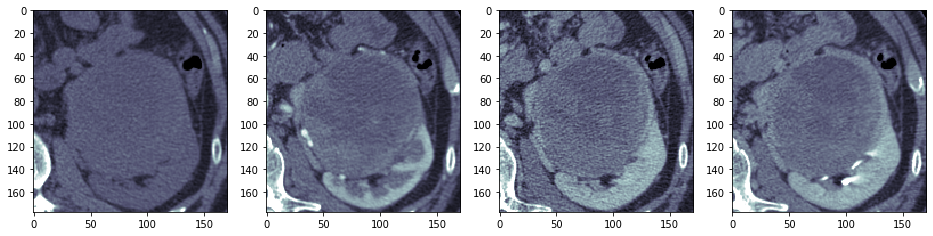

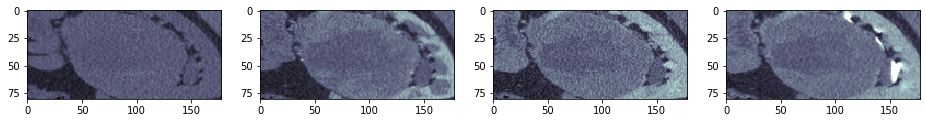

accession: 1210150630653953
{'diagnosis': {'accession_id_test': '1210150630653953',
               'label_test': 1,
               'predicted_opt_test': 1,
               'predicted_test': 2,
               'probability_test': [0.012889150530099869,
                                    0.40350908041000366,
                                    0.5836017727851868]},
 '充実部のwash_out': {'accession_id_test': '1210150630653953',
                  'label_test': 0,
                  'predicted_opt_test': 0,
                  'predicted_test': 0.0,
                  'probability_test': [0.043181922286748886,
                                       0.02139170467853546]},
 '充実部単純CT濃度': {'accession_id_test': '1210150630653953',
               'label_test': 2,
               'predicted_opt_test': 2,
               'predicted_test': 2.0,
               'probability_test': [0.9033840298652649, 0.7755210995674133]},
 '早期相不均一さ': {'accession_id_test': '1210150630653953',
             'label_test': 0,
      

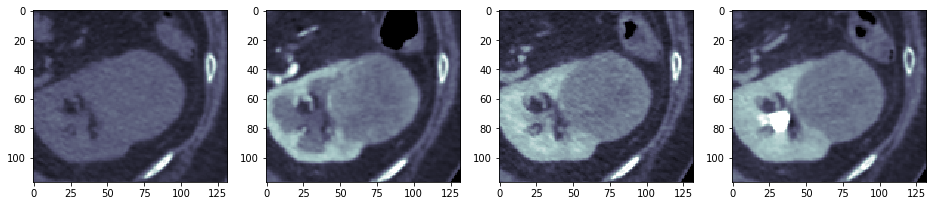

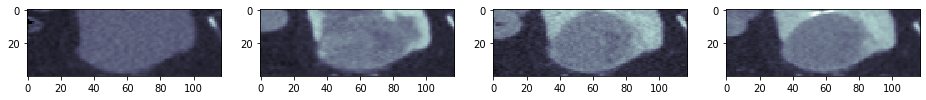

(0.05714285714285714, 2, 35)
cond func 3
accession: 1110000000662059
{'diagnosis': {'accession_id_test': '1110000000662059',
               'label_test': 1,
               'predicted_opt_test': 1,
               'predicted_test': 0,
               'probability_test': [0.8898482322692871,
                                    0.03320746496319771,
                                    0.07694438099861145]},
 '充実部のwash_out': {'accession_id_test': '1110000000662059',
                  'label_test': 0,
                  'predicted_opt_test': 1,
                  'predicted_test': 2.0,
                  'probability_test': [0.7480983734130859, 0.5858314633369446]},
 '充実部単純CT濃度': {'accession_id_test': '1110000000662059',
               'label_test': 2,
               'predicted_opt_test': 2,
               'predicted_test': 2.0,
               'probability_test': [0.7498030662536621, 0.5301670432090759]},
 '早期相不均一さ': {'accession_id_test': '1110000000662059',
             'label_test': 2,
        

KeyboardInterrupt: 

In [31]:
import pandas as pd
from multiCNN.data_management import get_label

def get_diag_label(data_t_elm):
    return data_t_elm["diagnosis"]["label"]
data_t = trainer.get_max_epoch_result()
# data_t=[data_t_elm for data_t_elm in data_t if data_t_elm["diagnosis"]["label"]!=0]
    
# data_t
taskname="diagnosis"
ref_taskname="充実部単純CT濃度"
ref_tasknames=["充実部のwash_out","充実部単純CT濃度","早期相不均一さ"]
cond_funcs=[lambda x: x>0,lambda x: x>1,lambda x: x<2,lambda x: x<1,lambda x: True]
# cond_funcs=[lambda x: x>0 and x<2, lambda x: x<1 or 1<x ]
cond_evals={}
for subtype_i in range(3):
    cond_evals_child={}
    for ref_taskname in ref_tasknames:
        cond_evals_child_child={}
        for i,cond_func in enumerate(cond_funcs):
            cond_evals_child_child[i]=None
        cond_evals_child[ref_taskname]=cond_evals_child_child
    cond_evals[subtype_i]=cond_evals_child
    
for subtype_i in range(3):
    print("subtype",subtype_i)
    for ref_taskname in ref_tasknames:
        print("ref_taskname",ref_taskname)
        for i,cond_func in enumerate(cond_funcs):
            print("cond func",i)
            res=trainer.culc_cond_eval("fp",data_t,ref_taskname,taskname,subtype_i,cond_func,show_info=True)
            print(res)
            cond_evals[subtype_i][ref_taskname][i]=res[0]

cond_eval_dfs=[]

for subtype_i in range(3):
    cond_eval_df= pd.DataFrame.from_dict(cond_evals[subtype_i], orient='index').T
    cond_eval_dfs.append(cond_eval_df)
    print(cond_eval_df.head())
    cond_eval_df.to_csv(f'/data1/RCC/cond_eval{subtype_i}.csv')


            
#         print(trainer.culc_cond_eval(data_t,ref_taskname,taskname,subtype_i))
# print(len(trainer.result[0]["diagnosis"]["predicted_test"][max_id]))

In [32]:

import pickle
if False:
    with open("/data1/RCC/multitask_result_data.pkl", "wb") as f:
        pickle.dump(data_t, f)
#     print(data_t[0])


In [34]:
with open("/data1/RCC/multitask_result_data.pkl", "rb") as f:
    data_t=pickle.load( f)
    


In [41]:
from pprint import pprint as pp
print("data_t[0]=")
pp(data_t[0])
print("data_t[1]=")
pp(data_t[1])

data_t[0]=
{'diagnosis': {'accession_id': '1110000000060512',
               'label': 0,
               'predicted': 0,
               'predicted_opt': 0,
               'probability': [0.8998135328292847,
                               0.02442585863173008,
                               0.0757606104016304]},
 '充実部のwash_out': {'accession_id': '1110000000060512',
                  'label': 2,
                  'predicted': 1.0,
                  'predicted_opt': 0,
                  'probability': [0.5831407308578491, 0.44622713327407837]},
 '充実部単純CT濃度': {'accession_id': '1110000000060512',
               'label': 1,
               'predicted': 1.0,
               'predicted_opt': 1,
               'probability': [0.5775249600410461, 0.4175483286380768]},
 '早期相不均一さ': {'accession_id': '1110000000060512',
             'label': 2,
             'predicted': 2.0,
             'predicted_opt': 1,
             'probability': [0.6282187104225159, 0.5012957453727722]}}
data_t[1]=
{'diagnosis': {

In [24]:
data_t = trainer.get_max_epoch_result()
label_list=[data_elm["diagnosis"]["label"] for data_elm in data_t]
pred_list=[data_elm["diagnosis"]["predicted_opt"] for data_elm in data_t]

max_id 29


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_list,pred_list)

array([[133,   8,   9],
       [  3,  13,   0],
       [  0,   2,  20]])

In [17]:
data_t[0]["diagnosis"]["label"]

0

In [62]:
trainer.result[0][pred_type]["predicted_test"][max_id]

[0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0]

In [51]:
 trainer.result[0]["diagnosis"].keys()

dict_keys(['accession_id_test', 'label_test', 'predicted_test', 'probability_test', 'predicted_opt_test'])

In [25]:
38*5

190

In [21]:
trainer.result[0]["diagnosis"].keys()

dict_keys(['accession_id_test', 'label_test', 'predicted_test', 'probability_test'])

In [39]:
print(trainer.result[0]["diagnosis"].keys())

dict_keys(['accession_id_test', 'label_test', 'predicted_test', 'probability_test'])


In [17]:
import numpy as np
x=[[25.8 ,1.6,  2.6],[ 0.4,  2.6,  0.2],[ 0.,   0.6,  3.8]]
x=np.array(x)
x=x*5
print(x)


[[129.   8.  13.]
 [  2.  13.   1.]
 [  0.   3.  19.]]


In [18]:
x=[[26.6,  1.6,  1.8],
 [ 0.6,  2.6,  0. ],
 [ 0.,   0.4,  4. ]]
x=np.array(x)
x=x*5
print(x)


[[133.   8.   9.]
 [  3.  13.   0.]
 [  0.   2.  20.]]
